In [ ]:
import numpy as np
import pandas as pd
import io
import os
import cv2
from matplotlib import pyplot as plt

In [ ]:
def relu(x):
    return(np.maximum(x, 0))

In [ ]:
def derivative_relu(x):
    return x > 0

In [ ]:
relu_graph = []
for i in range (-100, 101):
    relu_graph.append(relu(i))

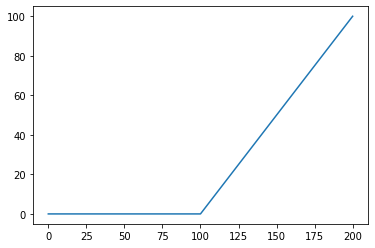

In [ ]:
plt.plot(relu_graph)
plt.show()

In [ ]:
relu_der_graph = []
for i in range (-100, 101):
    relu_der_graph.append(derivative_relu(i))

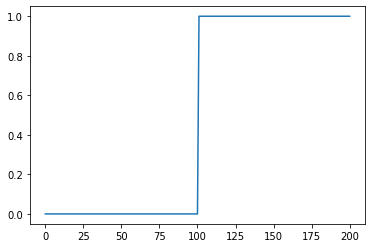

In [ ]:
plt.plot(relu_der_graph)
plt.show()

In [ ]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [ ]:
def derivative_sigmoid(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

In [ ]:
sigmoid_graph = []
i = -5
while i <= 5:
    sigmoid_graph.append(sigmoid(i))
    i = i + 0.1

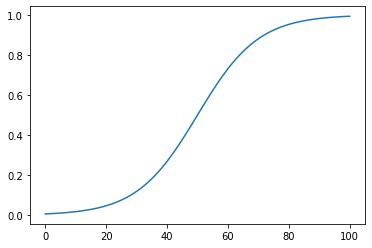

In [ ]:
plt.plot(sigmoid_graph)
plt.show()

In [ ]:
data_train = pd.read_csv('https://media.githubusercontent.com/media/FeNToNelele/MNIST-Digit-Recognition/main/mnist_data/mnist_train.csv')
data_train = np.array(data_train)

In [ ]:
data_test = pd.read_csv('https://media.githubusercontent.com/media/FeNToNelele/MNIST-Digit-Recognition/main/mnist_data/mnist_test.csv')
data_test = np.array(data_test)

In [ ]:
np.random.shuffle(data_train)
np.random.shuffle(data_test)

In [ ]:
def one_hot(Labels):  
    one_hot_Labels = np.zeros((Labels.size, Labels.max() + 1))
    for i in range(Labels.size):
      one_hot_Labels[i,Labels[i]] = 1
    one_hot_Labels = one_hot_Labels.T   
    return one_hot_Labels

In [ ]:
def normalize(dataset):
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[1]):
            dataset[i, j] = dataset[i, j] / 255
    return dataset

In [ ]:
data_train = data_train.T
data_test = data_test.T

In [ ]:
x_train = data_train[1:,:] / 255
x_test = data_test[1:,:] / 255

In [ ]:
y_train = data_train[0,:]
y_test = data_test[0,:]

In [ ]:
def init_weights():
    w1 = np.random.rand(784, 10)
    w2 = np.random.rand(10, 10)
    w3 = np.random.rand(10, 10)
    return w1, w2, w3

In [ ]:
class Network:
    def softmax(self, x):
        return np.exp(x) / sum(np.exp(x))

    def __init__(self, x_train, y_train, epochs, learning_rate):
        self.input_layer = x_train
        self.expected = y_train
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.accuracy = []
        self.w1, self.w2 = self.init_weights()
        self.b1, self.b2 = self.init_biases()
        self.one_hot_y = one_hot(y_train)
    
    def init_biases(self):
        b1 = np.random.rand(10,1) - 0.5
        b2 = np.random.rand(10,1) - 0.5
        return b1, b2

    def init_weights(self):
        w1 = np.random.rand(10, 784) - 0.5
        w2 = np.random.rand(10, 10) - 0.5
        return w1, w2

    def feedforward(self):
        """for i in range(self.input_layer.shape[0]):
          print("row: "+str(i))
          for j in range(self.input_layer.shape[1]):
            if self.input_layer[i,j] > 0:
              print(self.input_layer[i,j])"""
        self.z1 = self.w1.dot(self.input_layer) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = self.w2.dot(self.a1) + self.b2
        self.a2 = self.softmax(self.z2)

    def get_prediction_sample_data(self):
        self.z1 = self.w1.dot(self.input_layer) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = self.w2.dot(self.a1) + self.b2
        self.a2 = self.softmax(self.z2)
        return np.argmax(self.a2, axis = 0)

    def backpropagation(self):
        a2_error = self.a2 - self.one_hot_y
        w2_error =  (1 / self.expected.shape[0]) * a2_error.dot(self.a1.T)
        b2_error = (1 / self.expected.shape[0]) * np.sum(a2_error)

        z1_error = self.w2.T.dot(a2_error) * derivative_relu(self.z1)
        w1_error = (1 / self.expected.shape[0]) * z1_error.dot(self.input_layer.T)
        b1_error = (1 / self.expected.shape[0]) * np.sum(z1_error)

        self.w2 = self.w2 - self.learning_rate * w2_error
        self.w1 = self.w1 - self.learning_rate * w1_error

        self.b2 = self.b2 - self.learning_rate * b2_error
        self.b1 = self.b1 - self.learning_rate * b1_error
    
    
    def model_accuracy(self):
        return np.count_nonzero(np.argmax(self.a2, axis=0) == self.expected) / self.expected.shape[0]
    
    def train_model(self):
        for epoch in range(self.epochs):
            self.feedforward()
            self.backpropagation()
            self.accuracy.append(self.model_accuracy())
            #self.learning_rate = self.learning_rate * 0.99 #dinamikusan változtatható learning rate
            if epoch % 20 == 0:
                print("Epoch: {0}, accuracy: {1}".format(epoch, self.accuracy[epoch]))

    def test_network(self, x_test, y_test):
        self.input_layer = x_test
        self.expected = y_test
        self.feedforward()
        guess_accuracy = self.model_accuracy()

        print("A hálózat pontossága: "+str(guess_accuracy))

In [ ]:
def plot_accuracy(accuracy):
    plt.figure(dpi = 125)
    plt.plot(accuracy)

In [ ]:
neuralNetwork = Network(x_train, y_train, 3000, 0.035)
neuralNetwork.train_model()

Epoch: 0, accuracy: 0.07708333333333334
Epoch: 20, accuracy: 0.18038333333333334
Epoch: 40, accuracy: 0.26088333333333336
Epoch: 60, accuracy: 0.32188333333333335
Epoch: 80, accuracy: 0.3826
Epoch: 100, accuracy: 0.43771666666666664
Epoch: 120, accuracy: 0.4822166666666667
Epoch: 140, accuracy: 0.5191
Epoch: 160, accuracy: 0.5506
Epoch: 180, accuracy: 0.5790666666666666
Epoch: 200, accuracy: 0.6014666666666667
Epoch: 220, accuracy: 0.6225166666666667
Epoch: 240, accuracy: 0.6397333333333334
Epoch: 260, accuracy: 0.6553
Epoch: 280, accuracy: 0.6691
Epoch: 300, accuracy: 0.6819
Epoch: 320, accuracy: 0.6928166666666666
Epoch: 340, accuracy: 0.7029
Epoch: 360, accuracy: 0.7129666666666666
Epoch: 380, accuracy: 0.7216666666666667
Epoch: 400, accuracy: 0.72985
Epoch: 420, accuracy: 0.7373333333333333
Epoch: 440, accuracy: 0.7440833333333333
Epoch: 460, accuracy: 0.7505
Epoch: 480, accuracy: 0.7556
Epoch: 500, accuracy: 0.76095
Epoch: 520, accuracy: 0.7657333333333334
Epoch: 540, accuracy: 0.

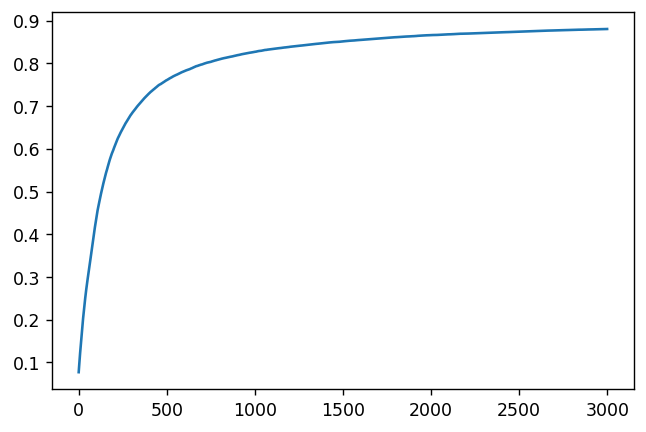

In [ ]:
plot_accuracy(neuralNetwork.accuracy)


In [ ]:
neuralNetwork.test_network(x_test, y_test)

A hálózat pontossága: 0.8849


In [ ]:
import os
os.system('curl -O https://raw.githubusercontent.com/FeNToNelele/MNIST-Digit-Recognition/main/samples/1.png')
data=plt.imread('1.png')
img = cv2.imread('1.png')

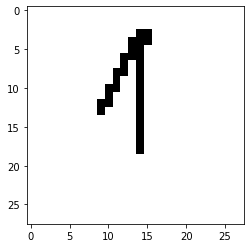

In [ ]:
plt.imshow(data)

In [ ]:
def test_own_samples(img: np.ndarray):
    img = np.invert(img) / 255
    neuralNetwork.input_layer = np.reshape(img, (784, 1))
    prediction = neuralNetwork.get_prediction_sample_data()
    
    print("Tipp: "+str(int(prediction)))

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('1.png', cv2.IMREAD_UNCHANGED)[:,:,0]
cv2_imshow(img)
test_own_samples(img)

Tipp: 1
